In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.interpolate import UnivariateSpline

In [2]:
with open("lpf_sensor_data.pkl", "rb") as f:
    sensor_data = pickle.load(f)

In [3]:
interpolation_funcs = {}

for mat in range(2):
    interpolation_funcs[f"mat_{mat}"] = {}
    for sensor in range(8):
        interpolation_funcs[f"mat_{mat}"][sensor] = {}
        for heater in range(10):
            interpolation_funcs[f"mat_{mat}"][sensor][heater] = {}
            heater_step = sensor_data[f"mat_{mat}"][sensor][heater]

            print("gas", mat, sensor, heater)
            filtered = heater_step["Filtered_Gas"].values
            time = heater_step["Time Since PowerOn"].values
            interpolation_func = UnivariateSpline(time, filtered, s=0)
            interpolation_funcs[f"mat_{
                mat}"][sensor][heater]["gas"] = interpolation_func

            print("temp", mat, sensor, heater)
            filtered = heater_step["Filtered_Temperature"].values
            time = heater_step["Time Since PowerOn"].values
            interpolation_func = UnivariateSpline(time, filtered, s=0)
            interpolation_funcs[f"mat_{
                mat}"][sensor][heater]["temp"] = interpolation_func

            print("press", mat, sensor, heater)
            filtered = heater_step["Filtered_Pressure"].values
            time = heater_step["Time Since PowerOn"].values
            interpolation_func = UnivariateSpline(time, filtered, s=0)
            interpolation_funcs[f"mat_{
                mat}"][sensor][heater]["press"] = interpolation_func

            print("rh", mat, sensor, heater)
            filtered = heater_step["Filtered_Relative_Humidity"].values
            time = heater_step["Time Since PowerOn"].values
            interpolation_func = UnivariateSpline(time, filtered, s=0)
            interpolation_funcs[f"mat_{
                mat}"][sensor][heater]["rh"] = interpolation_func

            print("\n------------------------\n")

gas 0 0 0
temp 0 0 0
press 0 0 0
rh 0 0 0

------------------------

gas 0 0 1
temp 0 0 1
press 0 0 1
rh 0 0 1

------------------------

gas 0 0 2
temp 0 0 2
press 0 0 2
rh 0 0 2

------------------------

gas 0 0 3
temp 0 0 3
press 0 0 3
rh 0 0 3

------------------------

gas 0 0 4
temp 0 0 4
press 0 0 4
rh 0 0 4

------------------------

gas 0 0 5
temp 0 0 5
press 0 0 5
rh 0 0 5

------------------------

gas 0 0 6
temp 0 0 6
press 0 0 6
rh 0 0 6

------------------------

gas 0 0 7
temp 0 0 7
press 0 0 7
rh 0 0 7

------------------------

gas 0 0 8
temp 0 0 8
press 0 0 8
rh 0 0 8

------------------------

gas 0 0 9
temp 0 0 9
press 0 0 9
rh 0 0 9

------------------------

gas 0 1 0
temp 0 1 0
press 0 1 0
rh 0 1 0

------------------------

gas 0 1 1
temp 0 1 1
press 0 1 1
rh 0 1 1

------------------------

gas 0 1 2
temp 0 1 2
press 0 1 2
rh 0 1 2

------------------------

gas 0 1 3
temp 0 1 3
press 0 1 3
rh 0 1 3

------------------------

gas 0 1 4
temp 0 1 4
press 0 1 4
r

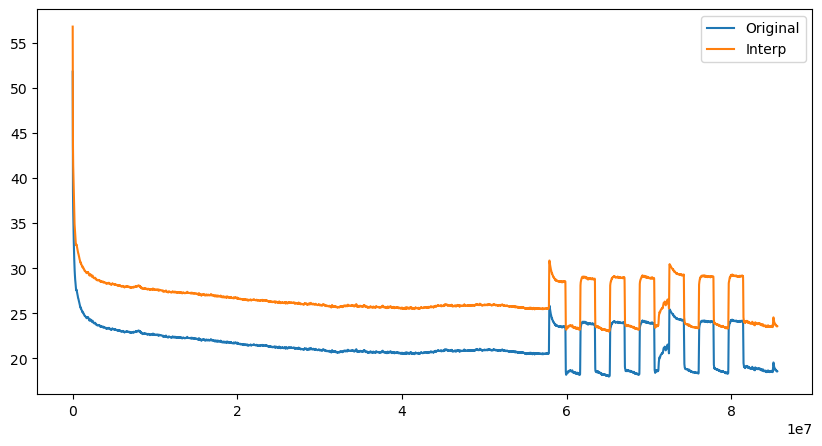

In [9]:
mat = 0
sensor = 0
heater_step = 0
heater = sensor_data[f"mat_{mat}"][sensor][heater_step]

filt_data = heater["Filtered_Relative_Humidity"].values
time = heater["Time Since PowerOn"].values

interpolation_func = interpolation_funcs[f"mat_{mat}"][sensor][heater_step]["rh"]
interpolated_time = np.linspace(time[0], time[-1], len(time) * 2)
interpolated_data = interpolation_func(interpolated_time)

plt.figure(figsize=(10, 5))
plt.plot(time, filt_data, label="Original")
plt.plot(interpolated_time, interpolated_data + 5, label="Interp")
# plt.yscale("log")
plt.legend()
plt.show()

In [10]:
with open("interpolation_functions.pkl", "wb") as f:
    pickle.dump(interpolation_funcs, f)